# Temps de réponse des deux bases combinées

Temps de réponse et graphes pour les deux bases simultanément.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns
import scipy
from scipy import stats
import random
import statistics

In [2]:
import findspark
import pyspark
from pyspark.sql import *

In [3]:
NUMBER_OF_THREADS_TO_USE = "8" #you can change it according to the features of your PC's CPU

spark = SparkSession.builder \
    .master('local[' + NUMBER_OF_THREADS_TO_USE + ']') \
    .appName('pyspark_test') \
    .getOrCreate()

sc = spark.sparkContext
sc

<SparkContext master=local[8] appName=pyspark_test>

In [4]:
RunNo = [5, 6, 9, 10, 12, 13]

In [5]:
tab_bon = [28, 29, 30, 49, 50, 51, 52, 53, 68, 69, 70, 71, 72]

In [6]:
Run = RunNo + tab_bon

In [7]:
for i in Run:
    globals()["data{}".format(i)] = pd.read_csv('D:/Documents/3A/Stage_CAV/Donnees/USA_platform/Temps_reaction/'+'data{}_mieux.csv'.format(i), sep = ',', decimal = '.', low_memory = False)

In [8]:
#temps de réponse par rapport au leader
df_tps_reponse_leader_CARMA = pd.read_csv('D:/Documents/3A/Stage_CAV/Donnees/USA_platform/Temps_reaction/'+'df_tps_reponse_leader_CARMA.csv'.format(i), sep = ',', decimal = '.', low_memory = False)
df_tps_reponse_leader_CACC_proof = pd.read_csv('D:/Documents/3A/Stage_CAV/Donnees/USA_platform/Temps_reaction/'+'df_tps_reponse_leader_CACC.csv'.format(i), sep = ',', decimal = '.', low_memory = False)
df_tps_reponse_leader_ACC = pd.read_csv('D:/Documents/3A/Stage_CAV/Donnees/USA_platform/Temps_reaction/'+'df_tps_reponse_leader_ACC.csv'.format(i), sep = ',', decimal = '.', low_memory = False)

#temps de réponse par rapport au prédécesseur
df_tps_reponse_predec_CARMA = pd.read_csv('D:/Documents/3A/Stage_CAV/Donnees/USA_platform/Temps_reaction/'+'df_tps_reponse_predec_CARMA.csv'.format(i), sep = ',', decimal = '.', low_memory = False)
df_tps_reponse_predec_CACC_proof = pd.read_csv('D:/Documents/3A/Stage_CAV/Donnees/USA_platform/Temps_reaction/'+'df_tps_reponse_predec_CACC.csv'.format(i), sep = ',', decimal = '.', low_memory = False)
df_tps_reponse_predec_ACC = pd.read_csv('D:/Documents/3A/Stage_CAV/Donnees/USA_platform/Temps_reaction/'+'df_tps_reponse_predec_ACC.csv'.format(i), sep = ',', decimal = '.', low_memory = False)

In [94]:
df_tps_reponse_predec_ACC.isna().sum()

follower    0
chgt1       0
chgt2       0
chgt3       0
chgt4       0
chgt5       0
chgt6       0
chgt7       0
chgt8       0
chgt9       0
chgt10      0
chgt11      1
chgt12      0
chgt13      0
chgt14      0
chgt15      2
chgt16      2
chgt17      2
chgt18      1
chgt19      1
chgt20      2
chgt21      2
chgt22      2
chgt23      2
dtype: int64

On peut déjà commencer par fusionner les deux df qui correspondent au CACC dans les deux bases.

In [9]:
#par rapport au leader
df_tps_reponse_leader_CACC = pd.DataFrame()
df_tps_reponse_leader_CACC['F'] = np.arange(1, 5)
df_tps_reponse_leader_CACC = pd.concat([df_tps_reponse_leader_CACC, df_tps_reponse_leader_CACC_proof, df_tps_reponse_leader_CARMA], axis = 1)

#par rapport au prédécesseur
df_tps_reponse_predec_CACC = pd.DataFrame()
df_tps_reponse_predec_CACC['F'] = np.arange(1, 5)
df_tps_reponse_predec_CACC = pd.concat([df_tps_reponse_predec_CACC, df_tps_reponse_predec_CACC_proof, df_tps_reponse_predec_CARMA], axis = 1)

In [10]:
#suppression de la colonne 'follower' répétée
#par rapport au leader
df_tps_reponse_leader_CACC = df_tps_reponse_leader_CACC.drop(df_tps_reponse_leader_CACC.columns[21], axis='columns')

#par rapport au prédécesseur
df_tps_reponse_predec_CACC = df_tps_reponse_predec_CACC.drop(df_tps_reponse_predec_CACC.columns[21], axis='columns')

In [11]:
colonnes = list(df_tps_reponse_leader_CACC.columns)

In [12]:
for i in range(1, len(colonnes)):
    colonnes[i] = 'chgt{}'.format(i)

In [13]:
df_tps_reponse_leader_CACC.columns = colonnes
df_tps_reponse_predec_CACC.columns = colonnes

In [40]:
df_tps_reponse_leader_CACC

,F,chgt1,chgt2,chgt3,chgt4,chgt5,chgt6,chgt7,chgt8,chgt9,...,chgt24,chgt25,chgt26,chgt27,chgt28,chgt29,chgt30,chgt31,chgt32,chgt33
0,1,0.40,0.65,0.30,1.75,0.05,0.10,0.05,1.75,0.30,...,0.1,0.4,0.4,0.3,0.3,0.6,0.5,1.4,1.5,1.1
1,2,3.15,0.45,0.30,2.40,1.65,0.05,0.10,3.70,0.55,...,0.1,0.6,0.3,0.3,1.9,0.6,0.6,3.6,3.9,3.6
2,3,7.75,1.75,1.90,5.30,3.20,0.25,0.25,4.50,4.20,...,1.0,0.1,0.1,0.1,3.6,0.6,0.4,3.2,5.4,5.3
3,4,4.80,0.75,0.55,6.80,6.85,0.40,4.80,6.00,6.65,...,0.8,0.6,0.3,0.2,5.1,0.7,0.3,5.7,7.7,7.6


In [41]:
33*4

132

## Tracé des points pour les deux modes

### Par rapport au leader

No handles with labels found to put in legend.


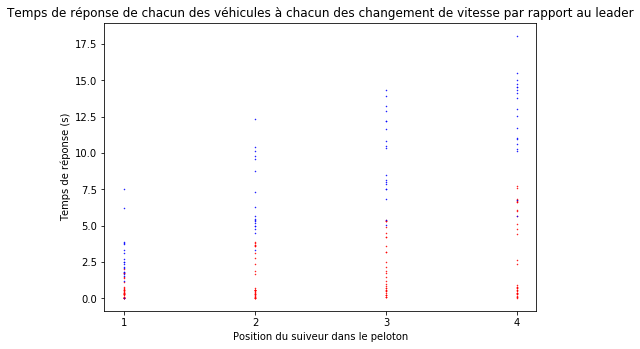

In [233]:
#tracé des temps de réponse par rapport au leader pour chacun des véhicules pour les enregistrements CACC
#choix du follower
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for j in range(1, len(df_tps_reponse_leader_CACC.columns) - 1):
    ax.plot(df_tps_reponse_leader_CACC.F, df_tps_reponse_leader_CACC['chgt{}'.format(j + 1)], 'or', markersize = 0.5)
for j in range(1, len(df_tps_reponse_leader_ACC.columns) - 1):
    ax.plot(df_tps_reponse_leader_ACC.follower, df_tps_reponse_leader_ACC['chgt{}'.format(j + 1)], 'ob', markersize = 0.5)
ax.set_xlabel("Position du suiveur dans le peloton")
ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.set_ylabel("Temps de réponse (s)")
ax.set_title("Temps de réponse de chacun des véhicules à chacun des changement de vitesse par rapport au leader")
ax.legend(loc='best', frameon=False)
plt.show()

In [97]:
for f in range(1,5):
    globals()['leader_ACC_f{}'.format(f)] = np.zeros(len(df_tps_reponse_leader_ACC.columns) - 1)
    globals()['leader_CACC_f{}'.format(f)] = np.zeros(len(df_tps_reponse_leader_CACC.columns) - 1)
    for i in range(1, len(df_tps_reponse_leader_ACC.columns)):
        globals()['leader_ACC_f{}'.format(f)][i - 1] = (f - 1) + random.uniform(0.9, 1.1)
    for i in range(1, len(df_tps_reponse_leader_CACC.columns)):
        globals()['leader_CACC_f{}'.format(f)][i - 1] = (f - 1) + random.uniform(0.9, 1.1)

In [98]:
for f in range(1, 5):
    globals()['leader_ACC_f{}_tps'.format(f)] = np.zeros(len(df_tps_reponse_leader_ACC.columns) - 1)
    globals()['leader_CACC_f{}_tps'.format(f)] = np.zeros(len(df_tps_reponse_leader_CACC.columns) - 1)
    for i in range(1, len(df_tps_reponse_leader_ACC.columns)):
        globals()['leader_ACC_f{}_tps'.format(f)][i - 1] = df_tps_reponse_leader_ACC['chgt{}'.format(i)][f - 1]
    for i in range(1, len(df_tps_reponse_leader_CACC.columns)):
        globals()['leader_CACC_f{}_tps'.format(f)][i - 1] = df_tps_reponse_leader_CACC['chgt{}'.format(i)][f - 1]

No handles with labels found to put in legend.


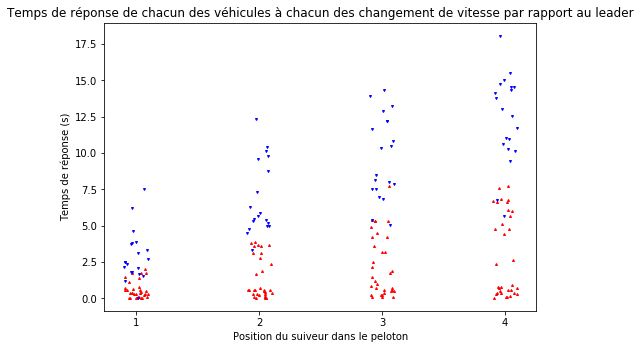

In [109]:
#tracé des temps de réponse par rapport au leader pour chacun des véhicules pour les enregistrements CACC
#choix du follower
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for f in range(1, 5):
    ax.plot(globals()['leader_CACC_f{}'.format(f)], globals()['leader_CACC_f{}_tps'.format(f)], '^r', markersize = 2)
    ax.plot(globals()['leader_ACC_f{}'.format(f)], globals()['leader_ACC_f{}_tps'.format(f)], 'vb', markersize = 2)
ax.set_xlabel("Position du suiveur dans le peloton")
ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.set_ylabel("Temps de réponse (s)")
ax.set_title("Temps de réponse de chacun des véhicules à chacun des changement de vitesse par rapport au leader")
ax.legend(loc='best', frameon=False)
plt.show()

In [77]:
CACC_f4

array([4.19301127, 4.01105207, 3.85606054, 4.05174727, 4.09505237,
       3.97025639, 3.88240515, 3.92905323, 3.90687035, 3.96809201,
       3.88537605, 4.07857173, 4.04412925, 4.07494553, 4.13455569,
       4.17994388, 3.94152693, 3.87844839, 3.80508753, 4.03298555,
       3.8381563 , 4.09871592, 3.95913163, 4.14829862, 4.14492762,
       3.85994073, 3.85809383, 3.96861895, 3.94695044, 3.84559972,
       3.85510192, 3.89974862, 0.        ])

### Par rapport au prédécesseur

No handles with labels found to put in legend.


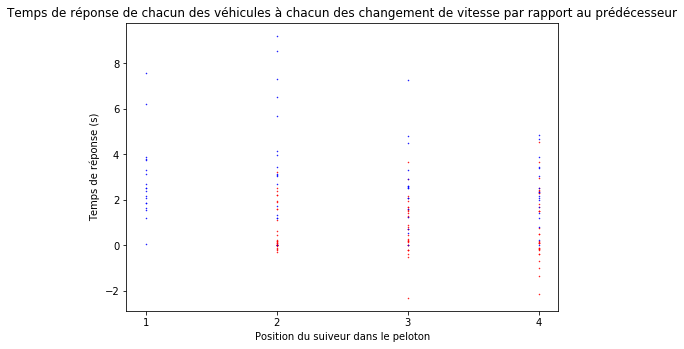

In [168]:
#tracé des temps de réponse par rapport au leader pour chacun des véhicules pour les enregistrements CACC
#choix du follower
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#pour le CACC, on ne doit pas prendre en compte l'instant de réponse entre le leader et le premier suiveur
#en revanche, pour le ACC, ça ne change pas car le temps entre deux véhicules consécutifs est toujours le même en moyenne
for j in range(1, len(df_tps_reponse_predec_CACC.columns) - 1):
    ax.plot(df_tps_reponse_predec_CACC.F[1:], df_tps_reponse_predec_CACC['chgt{}'.format(j + 1)][1:], 'or', markersize = 0.5)
for j in range(1, len(df_tps_reponse_predec_ACC.columns) - 1):
    ax.plot(df_tps_reponse_predec_ACC.follower, df_tps_reponse_predec_ACC['chgt{}'.format(j + 1)], 'ob', markersize = 0.5)
ax.set_xlabel("Position du suiveur dans le peloton")
ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.set_ylabel("Temps de réponse (s)")
ax.set_title("Temps de réponse de chacun des véhicules à chacun des changement de vitesse par rapport au prédécesseur")
ax.legend(loc='best', frameon=False)
plt.show()

In [99]:
for f in range(1,5):
    globals()['predec_ACC_f{}'.format(f)] = np.zeros(len(df_tps_reponse_predec_ACC.columns) - 1)
    globals()['predec_CACC_f{}'.format(f)] = np.zeros(len(df_tps_reponse_predec_CACC.columns) - 1)
    for i in range(1, len(df_tps_reponse_predec_ACC.columns)):
        globals()['predec_ACC_f{}'.format(f)][i - 1] = (f - 1) + random.uniform(0.9, 1.1)
    for i in range(1, len(df_tps_reponse_predec_CACC.columns)):
        globals()['predec_CACC_f{}'.format(f)][i - 1] = (f - 1) + random.uniform(0.9, 1.1)

In [100]:
for f in range(1, 5):
    globals()['predec_ACC_f{}_tps'.format(f)] = np.zeros(len(df_tps_reponse_predec_ACC.columns) - 1)
    globals()['predec_CACC_f{}_tps'.format(f)] = np.zeros(len(df_tps_reponse_predec_CACC.columns) - 1)
    for i in range(1, len(df_tps_reponse_predec_ACC.columns)):
        globals()['predec_ACC_f{}_tps'.format(f)][i - 1] = df_tps_reponse_predec_ACC['chgt{}'.format(i)][f - 1]
    for i in range(1, len(df_tps_reponse_predec_CACC.columns)):
        globals()['predec_CACC_f{}_tps'.format(f)][i - 1] = df_tps_reponse_predec_CACC['chgt{}'.format(i)][f - 1]

No handles with labels found to put in legend.


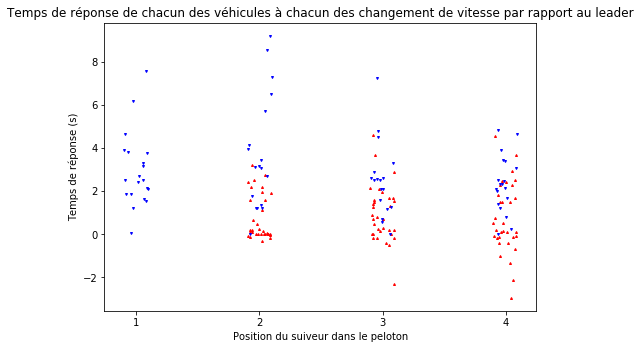

In [110]:
#tracé des temps de réponse par rapport au leader pour chacun des véhicules pour les enregistrements CACC
#choix du follower
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for f in range(2, 5):
    ax.plot(globals()['predec_CACC_f{}'.format(f)], globals()['predec_CACC_f{}_tps'.format(f)], '^r', markersize = 2)
for f in range(1, 5):
    ax.plot(globals()['predec_ACC_f{}'.format(f)], globals()['predec_ACC_f{}_tps'.format(f)], 'vb', markersize = 2)
ax.set_xlabel("Position du suiveur dans le peloton")
ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.set_ylabel("Temps de réponse (s)")
ax.set_title("Temps de réponse de chacun des véhicules à chacun des changement de vitesse par rapport au leader")
ax.legend(loc='best', frameon=False)
plt.show()

## Distributions

In [85]:
len(df_tps_reponse_predec_CACC.columns) - 1

33

In [61]:
df_tps_reponse_predec_ACC

,follower,chgt1,chgt2,chgt3,chgt4,chgt5,chgt6,chgt7,chgt8,chgt9,...,chgt14,chgt15,chgt16,chgt17,chgt18,chgt19,chgt20,chgt21,chgt22,chgt23
0,1,4.65,1.65,3.15,3.3,2.40,1.2,1.85,3.75,7.55,...,3.90,2.1,NaN,NaN,2.15,6.20,2.7,0.05,2.5,2.50
1,2,1.20,3.10,1.35,6.5,3.05,9.2,3.15,1.20,1.20,...,5.70,NaN,NaN,NaN,4.15,3.95,2.7,7.30,NaN,NaN
2,3,1.15,2.10,0.55,4.5,2.55,2.5,2.50,7.25,2.90,...,2.60,NaN,3.30,4.8,1.25,0.70,NaN,NaN,NaN,NaN
3,4,2.45,3.40,1.70,1.2,3.05,2.1,3.45,2.35,2.50,...,2.35,2.0,2.15,3.9,NaN,NaN,NaN,NaN,1.4,4.85


In [63]:
(len(df_tps_reponse_predec_ACC.columns) - 1)*(len(df_tps_reponse_predec_ACC.follower))

92

In [64]:
df_distribution_CACC = pd.DataFrame()
df_distribution_CACC_leader = pd.DataFrame()
df_distribution_ACC = pd.DataFrame()
df_distribution_ACC_leader = pd.DataFrame()

df_distribution_CACC['temps'] = [-1.00]*(len(df_tps_reponse_predec_CACC.columns) - 1)*(len(df_tps_reponse_predec_CACC.F[1:]))
df_distribution_CACC_leader['temps'] = [-1.00]*(len(df_tps_reponse_leader_CACC.columns) - 1)*(len(df_tps_reponse_leader_CACC))
df_distribution_ACC['temps'] = [-1.00]*(len(df_tps_reponse_predec_ACC.columns) - 1)*(len(df_tps_reponse_predec_ACC.follower))
df_distribution_ACC_leader['temps'] = [-1.00]*(len(df_tps_reponse_leader_ACC.columns) - 1)*(len(df_tps_reponse_leader_ACC.follower))

inc_cacc = 0
for j in range(1, len(df_tps_reponse_predec_CACC.columns)):
    #idem que précédemment, on raisonne sans prendre en compte le temps de réaction pur entre le leader et le f1
    for f in range(len(df_tps_reponse_predec_CACC.F[1:])):
        df_distribution_CACC['temps'][inc_cacc] = df_tps_reponse_predec_CACC['chgt{}'.format(j)][f]
        inc_cacc += 1
        
inc_cacc = 0
for j in range(1, len(df_tps_reponse_leader_CACC.columns)):
    #idem que précédemment, on raisonne sans prendre en compte le temps de réaction pur entre le leader et le f1
    for f in range(len(df_tps_reponse_leader_CACC.F)):
        df_distribution_CACC_leader['temps'][inc_cacc] = df_tps_reponse_leader_CACC['chgt{}'.format(j)][f]
        inc_cacc += 1
        
inc_acc = 0
for j in range(1, len(df_tps_reponse_predec_ACC.columns)):
    for f in range(len(df_tps_reponse_predec_ACC.follower)):
        df_distribution_ACC['temps'][inc_acc] = df_tps_reponse_predec_ACC['chgt{}'.format(j)][f]
        inc_acc += 1
        
inc_acc = 0
for j in range(1, len(df_tps_reponse_leader_ACC.columns)):
    for f in range(len(df_tps_reponse_leader_ACC.follower)):
        df_distribution_ACC_leader['temps'][inc_acc] = df_tps_reponse_leader_ACC['chgt{}'.format(j)][f]
        inc_acc += 1

In [66]:
#on ôte les 'nan'
liste_drop_CACC = []
for j in range(len(df_distribution_CACC)):
    if np.isnan(df_distribution_CACC.temps[j]):
        liste_drop_CACC.append(j)
        
liste_drop_CACC_leader = []
for j in range(len(df_distribution_CACC_leader)):
    if np.isnan(df_distribution_CACC_leader.temps[j]):
        liste_drop_CACC_leader.append(j)
        
liste_drop_ACC = []
for j in range(len(df_distribution_ACC)):
    if np.isnan(df_distribution_ACC.temps[j]):
        liste_drop_ACC.append(j)
        
liste_drop_ACC_leader = []
for j in range(len(df_distribution_ACC_leader)):
    if np.isnan(df_distribution_ACC_leader.temps[j]):
        liste_drop_ACC_leader.append(j)

In [53]:
liste_drop_ACC

[42, 43, 45, 48, 53, 56, 58, 59, 61, 62, 63, 64, 66, 67]

In [67]:
df_distribution_CACC.drop(liste_drop_CACC, 0, inplace = True)
df_distribution_CACC_leader.drop(liste_drop_CACC_leader, 0, inplace = True)
df_distribution_ACC.drop(liste_drop_ACC, 0, inplace = True)
df_distribution_ACC_leader.drop(liste_drop_ACC_leader, 0, inplace = True)

In [68]:
df_distribution_CACC = df_distribution_CACC.reset_index(drop = True)
df_distribution_CACC_leader = df_distribution_CACC_leader.reset_index(drop = True)
df_distribution_ACC = df_distribution_ACC.reset_index(drop = True)
df_distribution_ACC_leader = df_distribution_ACC_leader.reset_index(drop = True)

In [69]:
len(df_distribution_CACC), len(df_distribution_ACC), len(df_distribution_CACC_leader), len(df_distribution_ACC_leader)

(99, 75, 132, 79)

In [70]:
np.mean(df_distribution_CACC.temps), np.std(df_distribution_CACC.temps)

(0.7555555555555464, 1.0216813457072216)

In [71]:
np.mean(df_distribution_ACC.temps), np.std(df_distribution_ACC.temps)

(2.8773333333333344, 1.9447757939898598)

In [72]:
np.mean(df_distribution_CACC_leader.temps), np.std(df_distribution_CACC_leader.temps[:4*len(df_distribution_CACC_leader)//5])

(1.8022727272727008, 2.017872299423352)

In [73]:
df_distribution_ACC

,temps
0,4.65
1,1.20
2,1.15
3,2.45
4,1.65
...,...
70,7.30
71,2.50
72,1.40
73,2.50


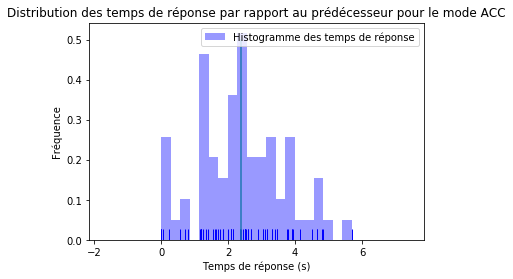

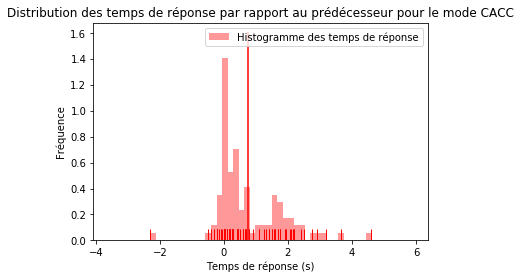

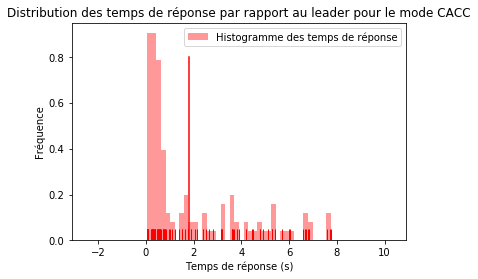

In [95]:
#on peut maintenant tracer les deux distributions
for i in range(3):
    fig = plt.figure()
    if i == 0:
        sns.distplot(df_distribution_ACC, 20, color = 'blue', rug = True, kde_kws = {'color': 'k', 'lw': 0}, label = 'Histogramme des temps de réponse') 
        plt.plot((np.mean(df_distribution_ACC), np.mean(df_distribution_ACC)), (0, 0.5))
        plt.legend(loc = 'best')
        plt.title('Distribution des temps de réponse par rapport au prédécesseur pour le mode ACC') 
    elif i == 1:
        sns.distplot(df_distribution_CACC, 40, color = 'red', rug = True, kde_kws = {'color': 'k', 'lw': 0}, label = 'Histogramme des temps de réponse')
        plt.plot((np.mean(df_distribution_CACC), np.mean(df_distribution_CACC)), (0, 1.6), 'r')
        plt.title('Distribution des temps de réponse par rapport au prédécesseur pour le mode CACC') 
        plt.legend(loc = 'best')
    else:
        sns.distplot(df_distribution_CACC_leader, 40, color = 'red', rug = True, kde_kws = {'color': 'k', 'lw': 0}, label = 'Histogramme des temps de réponse')
        plt.plot((np.mean(df_distribution_CACC_leader), np.mean(df_distribution_CACC_leader)), (0, 0.8), 'r')
        plt.title('Distribution des temps de réponse par rapport au leader pour le mode CACC') 
        plt.legend(loc = 'upper right')
    plt.xlabel('Temps de réponse (s)')
    plt.ylabel('Fréquence')  

In [76]:
#suppression des valeurs dans la distribution ACC qui sont trop grandes
#on peut déjà commencer par prendre 6 comme valeur max
liste_drop_ACC_max = []
for i in range(len(df_distribution_ACC.temps)):
    if abs(df_distribution_ACC.temps[i]) > 6:
        liste_drop_ACC_max.append(i)

In [77]:
df_distribution_ACC.drop(liste_drop_ACC_max, 0, inplace = True)

In [78]:
df_distribution_ACC = df_distribution_ACC.reset_index(drop = True)

In [79]:
#indicateur pour le mode ACC
TR_moy_ACC = np.mean(df_distribution_ACC.temps)
TR_sigma_ACC = np.std(df_distribution_ACC.temps)

Text(0, 0.5, 'Frequency')

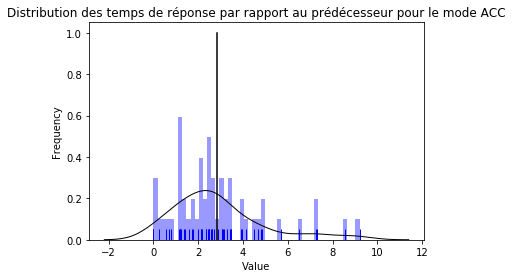

In [51]:
#on peut maintenant tracer les deux distributions
fig = plt.figure()
sns.distplot(df_distribution_ACC, 50, color = 'blue', rug = True, kde_kws = {'color': 'k', 'lw': 1}) 
plt.plot((TR_moy_ACC, TR_moy_ACC), (0, 1), '-k')
plt.title('Distribution des temps de réponse par rapport au prédécesseur pour le mode ACC')  
plt.xlabel('Value')
plt.ylabel('Frequency')  

In [152]:
#dessiner une distribution N(TR_moy_ACC, TR_sigma_ACC)
X = np.linspace(-5, 8, 10000)
Y = np.zeros(len(X))
for n in range(len(X)):
    Y[n] = 1/((TR_sigma_ACC)*np.sqrt(2*np.pi)) * np.exp(-1/2*((X[n] - TR_moy_ACC)/(TR_sigma_ACC))**2)

Text(0, 0.5, 'Frequency')

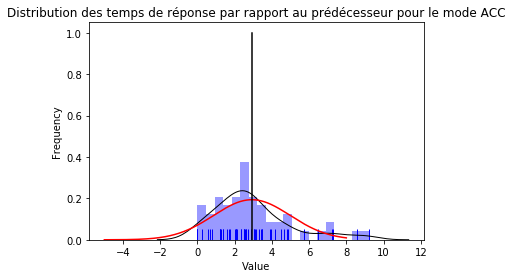

In [153]:
#on peut maintenant tracer les deux distributions
fig = plt.figure()
sns.distplot(df_distribution_ACC, 20, color = 'blue', rug = True, kde_kws = {'color': 'k', 'lw': 1}) 
plt.plot(X, Y, '-r')
plt.plot((TR_moy_ACC, TR_moy_ACC), (0, 1), '-k')
plt.title('Distribution des temps de réponse par rapport au prédécesseur pour le mode ACC')  
plt.xlabel('Value')
plt.ylabel('Frequency')  

Text(0, 0.5, 'Frequency')

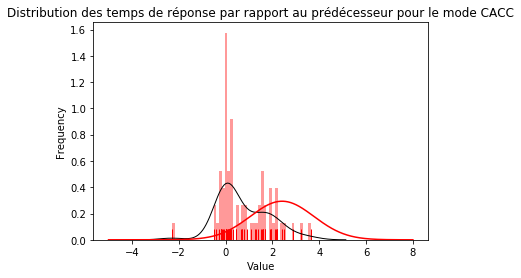

In [306]:
#on peut maintenant tracer les deux distributions
sns.distplot(df_distribution_CACC, 50, color = 'red', rug = True, kde_kws = {'color': 'k', 'lw': 1})
plt.plot(X, Y, '-r')
plt.title('Distribution des temps de réponse par rapport au prédécesseur pour le mode CACC') 
plt.xlabel('Value')
plt.ylabel('Frequency')  

In [286]:
#si on translate la distribution créée de 0.5
X_mieux = X - 0.7

#au même titre qu'on translate, on peut tenter de modifier l'écart type car on a un mélange d'ACC et de CACC dans les données

In [262]:
#indicateurs CACC
TR__moy_CACC = np.mean(df_distribution_CACC)
TR_sigma_CACC = np.std(df_distribution_CACC)

Text(0, 0.5, 'Frequency')

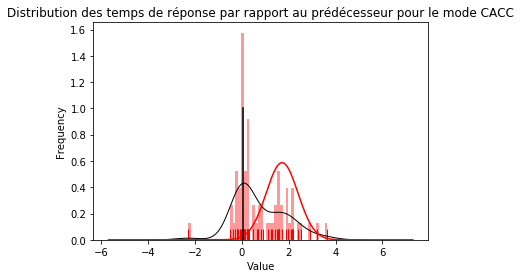

In [287]:
#on peut maintenant tracer les deux distributions
sns.distplot(df_distribution_CACC, 50, color = 'red', rug = True, kde_kws = {'color': 'k', 'lw': 1})
plt.plot(X_mieux, Y, '-r')
plt.plot((TR_moy_CACC - 0.7, TR_moy_CACC - 0.7), (0, 1), '-k')
plt.title('Distribution des temps de réponse par rapport au prédécesseur pour le mode CACC') 
plt.xlabel('Value')
plt.ylabel('Frequency')  

In [284]:
X_CACC = np.linspace(-5, 8, 1000)
Y_CACC = np.zeros(len(X_CACC))
for n in range(len(X_CACC)):
    Y_CACC[n] = 1/((TR_sigma_CACC/2)*np.sqrt(2*np.pi)) * np.exp(-1/2*((X_CACC[n] - (TR_moy_CACC - 0.7))/(TR_sigma_CACC/2))**2)

Text(0, 0.5, 'Frequency')

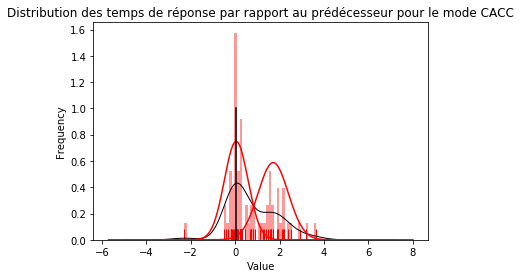

In [288]:
#on peut maintenant tracer les deux distributions
sns.distplot(df_distribution_CACC, 50, color = 'red', rug = True, kde_kws = {'color': 'k', 'lw': 1})
plt.plot(X_mieux, Y, '-r')
plt.plot(X_CACC, Y_CACC, '-r')
plt.plot((TR_moy_CACC - 0.7, TR_moy_CACC - 0.7), (0, 1), '-k')
plt.title('Distribution des temps de réponse par rapport au prédécesseur pour le mode CACC') 
plt.xlabel('Value')
plt.ylabel('Frequency')  

## Avec une distribution log-normale ou gamma

In [80]:
from scipy.stats import lognorm

In [81]:
#pour le CACC
s_CACC = np.std(df_distribution_CACC_leader.temps)
rv_CACC = lognorm(s_CACC)
x_CACC = np.linspace(0, 10, 100)

In [82]:
#pour le CACC predec
s_CACC_predec = np.std(df_distribution_CACC.temps)
rv_CACC_predec = lognorm(s_CACC_predec)
x_CACC_predec = np.linspace(0, 10, 100)

In [83]:
s_ACC, s_CACC

(2.030859037390843, 2.1135911529866744)

In [84]:
#test ACC lognormale
s_ACC = np.std(df_distribution_ACC.temps)
rv_ACC = lognorm(s_ACC)
x_ACC = np.linspace(0, 10, 100)

In [85]:
#pour l'ACC
dist_name = "gamma"
dist = getattr(scipy.stats, dist_name)
param = dist.fit(df_distribution_ACC.temps)

In [86]:
param_CACC

(0.47359233480174234, 0.04999999999998293, 1.8832843665943724)

In [87]:
loc = param[-2]
scale = param[-1]
arg = param[:-2]

In [88]:
y, x = np.histogram(df_distribution_ACC.temps, bins=1000, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

In [89]:
pdf = dist.pdf(x, loc=loc, scale=scale, *arg)

In [90]:
#test CACC gamma
dist_name_CACC = "gamma"
dist_CACC = getattr(scipy.stats, dist_name_CACC)
param_CACC = dist.fit(df_distribution_CACC_leader.temps)

In [91]:
loc_CACC = param_CACC[-2]
scale_CACC = param_CACC[-1]
arg_CACC = param_CACC[:-2]

In [92]:
y_CACC, x_CACC = np.histogram(df_distribution_CACC_leader.temps, bins=1000, density=True)
x_CACC = (x_CACC + np.roll(x_CACC, -1))[:-1] / 2.0

In [93]:
pdf_CACC = dist.pdf(x_CACC, loc=loc_CACC, scale=scale_CACC, *arg_CACC)

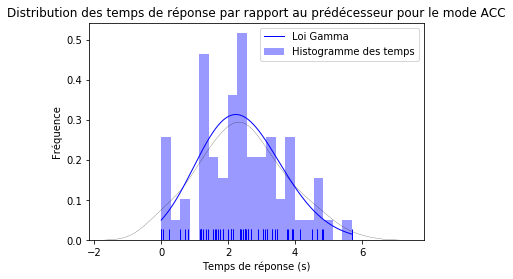

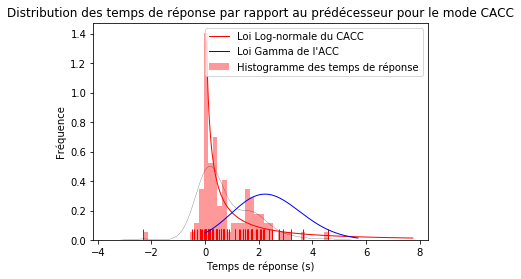

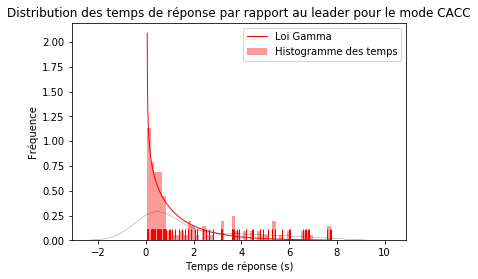

In [94]:
#on peut maintenant tracer les deux distributions
for i in range(3):
    fig = plt.figure()
    if i == 0:
        sns.distplot(df_distribution_ACC, 20, color = 'blue', rug = True, kde_kws = {'color': 'k', 'lw': 0.2}, label = 'Histogramme des temps') 
        #plt.plot((np.mean(df_distribution_ACC), np.mean(df_distribution_ACC)), (0, 0.5), 'b')
        plt.plot(x, pdf, '-b', label = 'Loi Gamma', linewidth = 1)
        #plt.plot(x_ACC, rv_ACC.pdf(x_ACC), 'b-', linewidth = 1, label = 'Loi Log-normale')
        plt.legend(loc = 'best')
        plt.title('Distribution des temps de réponse par rapport au prédécesseur pour le mode ACC') 
    elif i == 1:
        sns.distplot(df_distribution_CACC, 40, color = 'red', rug = True, kde_kws = {'color': 'k', 'lw': 0.2}, label = 'Histogramme des temps de réponse')
        #plt.plot((np.mean(df_distribution_CACC), np.mean(df_distribution_CACC)), (0, 1.6), 'r')
        plt.plot(x_CACC, rv_CACC.pdf(x_CACC), 'r-', linewidth = 1, label = "Loi Log-normale du CACC")
        plt.plot(x, pdf, '-b', label = "Loi Gamma de l'ACC", linewidth = 1) 
        plt.title('Distribution des temps de réponse par rapport au prédécesseur pour le mode CACC') 
        plt.legend(loc = 'upper right')
    else:
        sns.distplot(df_distribution_CACC_leader, 50, color = 'red', rug = True, kde_kws = {'color': 'k', 'lw': 0.2}, label = 'Histogramme des temps')
        #plt.plot((np.mean(df_distribution_CACC_leader), np.mean(df_distribution_CACC_leader)), (0, 1), 'r')
        #plt.plot(x_CACC, rv_CACC.pdf(x_CACC), 'r-', linewidth = 1, label = 'Loi Log-normale')
        plt.plot(x_CACC, pdf_CACC, '-r', label = 'Loi Gamma', linewidth = 1)
        plt.legend(loc = 'best')
        plt.title('Distribution des temps de réponse par rapport au leader pour le mode CACC') 
    plt.xlabel('Temps de réponse (s)')
    plt.ylabel('Fréquence')  

In [59]:
#on passe les valeurs absolues pour la distribution du CACC par rapport au prédécesseur
for i in range(len(df_distribution_CACC.temps)):
    df_distribution_CACC.temps[i] = abs(df_distribution_CACC.temps[i])

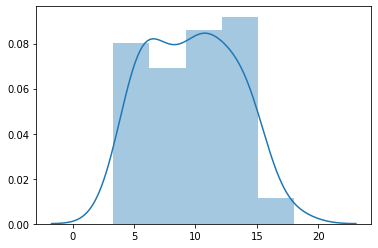

In [147]:
sns.distplot(df_distribution_ACC_leader)

## Détermination de la validité du CACC

In [98]:
#facteur correspondant à 1, 2 ou 3 (pour tracer l'erreur à 1, 2 ou 3 sigma)
facteur1 = 1
facteur2 = 2
facteur3 = 3

In [156]:
#TEMPS DE REPONSE PROPRE A CHAQUE POSITION
#on peut raisonner avec les moyennes et les écarts types des valeurs correspondant à chacun des véhicules pour être plus précis
#on veut le temps de réponse moyen au leader pour chacune des positions, on raisonne donc sur 'df_tps_reponse_leader_ACC'
for f in range(4):
    globals()['TR_ACC_f{}'.format(f)] = []
    for k in range(1, len(df_tps_reponse_leader_ACC.columns)):
        if np.isfinite(df_tps_reponse_leader_ACC['chgt{}'.format(k)][f]): 
            globals()['TR_ACC_f{}'.format(f)].append(df_tps_reponse_leader_ACC['chgt{}'.format(k)][f])  

for f in range(4):
    globals()['TR_CACC_f{}'.format(f)] = []
    for k in range(1, len(df_tps_reponse_leader_CACC.columns)):
        if np.isfinite(df_tps_reponse_leader_CACC['chgt{}'.format(k)][f]): 
            globals()['TR_CACC_f{}'.format(f)].append(df_tps_reponse_leader_CACC['chgt{}'.format(k)][f]) 

In [157]:
#TEMPS DE REPONSE MOYEN
for f in range(4):
    globals()['TR_moy_ACC_f{}'.format(f)] = np.mean(globals()['TR_ACC_f{}'.format(f)])
    globals()['TR_sigma_ACC_f{}'.format(f)] = np.std(globals()['TR_ACC_f{}'.format(f)])

for f in range(4):
    globals()['TR_moy_CACC_f{}'.format(f)] = np.mean(globals()['TR_CACC_f{}'.format(f)])
    globals()['TR_sigma_CACC_f{}'.format(f)] = np.std(globals()['TR_CACC_f{}'.format(f)])

In [158]:
#ECARTS TYPES POUR LE MODE ACC
#création d'une liste contenant les écarts types de chacune des positions dans le peloton
#on fait les calculs pour chacun des sigma
for i in range(1, 4):
    globals()['TR_sigma_plus_indiv_acc{}'.format(i)] = []
    globals()['TR_sigma_moins_indiv_acc{}'.format(i)] = []
    for f in range(4):
        globals()['TR_sigma_plus_indiv_acc{}'.format(i)].append(globals()['TR_moy_ACC_f{}'.format(f)] + globals()['facteur{}'.format(i)]*globals()['TR_sigma_ACC_f{}'.format(f)])
        globals()['TR_sigma_moins_indiv_acc{}'.format(i)].append(globals()['TR_moy_ACC_f{}'.format(f)] - globals()['facteur{}'.format(i)]*globals()['TR_sigma_ACC_f{}'.format(f)])
    
    globals()['TR_sigma_plus_indiv_cacc{}'.format(i)] = []
    globals()['TR_sigma_moins_indiv_cacc{}'.format(i)] = []
    for f in range(4):
        globals()['TR_sigma_plus_indiv_cacc{}'.format(i)].append(globals()['TR_moy_CACC_f{}'.format(f)] + globals()['facteur{}'.format(i)]*globals()['TR_sigma_CACC_f{}'.format(f)])
        globals()['TR_sigma_moins_indiv_cacc{}'.format(i)].append(globals()['TR_moy_CACC_f{}'.format(f)] - globals()['facteur{}'.format(i)]*globals()['TR_sigma_CACC_f{}'.format(f)])
    

In [159]:
#CREATION DE LA LISTE CONTENANT LES TR MOYENS POUR CHAQUE VEHICULE : POUR TRACER ENSUITE
#création d'une liste contenant la valeur de chaque TR_moy
TR_moy_ACC_indiv = []
for f in range(4):
    TR_moy_ACC_indiv.append(globals()['TR_moy_ACC_f{}'.format(f)])
    
TR_moy_CACC_indiv = []
for f in range(4):
    TR_moy_CACC_indiv.append(globals()['TR_moy_CACC_f{}'.format(f)])

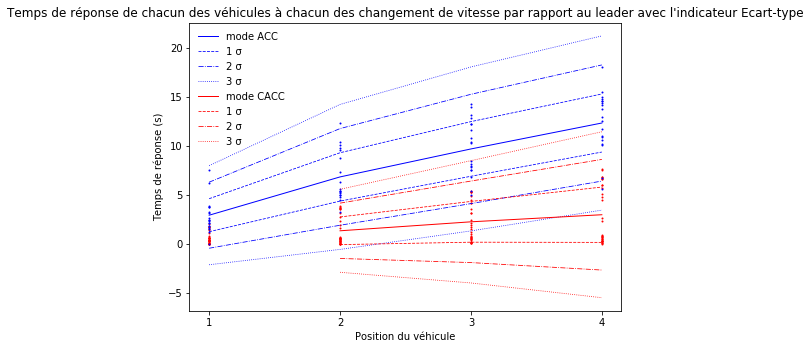

In [146]:
#tracé des temps de réponse par rapport au leader pour chacun des véhicules pour les enregistrements CACC
#choix du follower
c_acc = ['--b', '-.b', ':b']
c_cacc = ['--r', '-.r', ':r']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for j in range(1, len(df_tps_reponse_leader_CACC.columns) - 1):
    ax.plot(df_tps_reponse_leader_CACC.F, df_tps_reponse_leader_CACC['chgt{}'.format(j + 1)], 'or', markersize = 1) 
for j in range(1, len(df_tps_reponse_leader_ACC.columns) - 1):
    ax.plot(df_tps_reponse_leader_ACC.follower, df_tps_reponse_leader_ACC['chgt{}'.format(j + 1)], 'ob', markersize = 1) 

#ACC
ax.plot(df_tps_reponse_predec_ACC.follower, TR_moy_ACC_indiv, '-b', linewidth = 1, label = 'mode ACC')
for i in range(1, 4):
    ax.plot(df_tps_reponse_predec_ACC.follower, globals()['TR_sigma_moins_indiv_acc{}'.format(i)], c_acc[i-1], linewidth = 0.8, markersize = 0.8, label = '{} σ'.format(i))
    ax.plot(df_tps_reponse_predec_ACC.follower, globals()['TR_sigma_plus_indiv_acc{}'.format(i)], c_acc[i-1], linewidth = 0.8, markersize = 0.8)

#CACC
ax.plot(df_tps_reponse_predec_CACC.F[1:], TR_moy_CACC_indiv, '-r', linewidth = 1, label = 'mode CACC')
for i in range(1, 4):
    ax.plot(df_tps_reponse_predec_CACC.F[1:], globals()['TR_sigma_moins_indiv_cacc{}'.format(i)], c_cacc[i-1], linewidth = 0.8, markersize = 0.8, label = '{} σ'.format(i))
    ax.plot(df_tps_reponse_predec_CACC.F[1:], globals()['TR_sigma_plus_indiv_cacc{}'.format(i)], c_cacc[i-1], linewidth = 0.8, markersize = 0.8)
ax.set_title("Temps de réponse de chacun des véhicules à chacun des changement de vitesse par rapport au leader avec l'indicateur Ecart-type")
ax.set_xlabel("Position du véhicule")
ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.set_ylabel("Temps de réponse (s)")
ax.legend(loc='best', frameon=False)
plt.show()

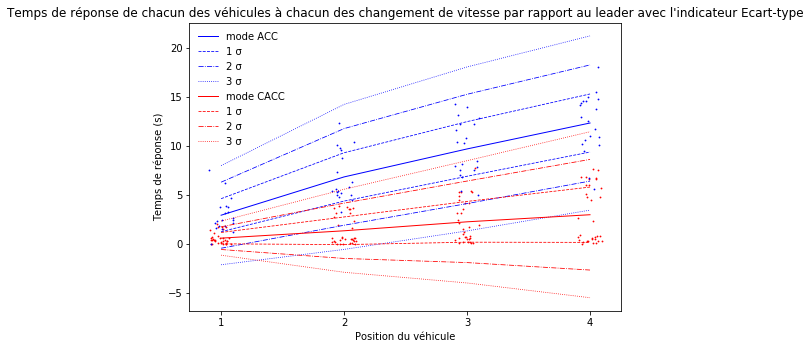

In [160]:
#tracé des temps de réponse par rapport au leader pour chacun des véhicules pour les enregistrements CACC
#choix du follower
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
c_acc = ['--b', '-.b', ':b']
c_cacc = ['--r', '-.r', ':r']

for f in range(1, 5):
    ax.plot(globals()['leader_CACC_f{}'.format(f)], globals()['leader_CACC_f{}_tps'.format(f)], 'or', markersize = 0.8)
    ax.plot(globals()['leader_ACC_f{}'.format(f)], globals()['leader_ACC_f{}_tps'.format(f)], 'ob', markersize = 0.8)
#ACC
ax.plot(df_tps_reponse_predec_ACC.follower, TR_moy_ACC_indiv, '-b', linewidth = 1, label = 'mode ACC')
for i in range(1, 4):
    ax.plot(df_tps_reponse_predec_ACC.follower, globals()['TR_sigma_moins_indiv_acc{}'.format(i)], c_acc[i-1], linewidth = 0.8, markersize = 0.8, label = '{} σ'.format(i))
    ax.plot(df_tps_reponse_predec_ACC.follower, globals()['TR_sigma_plus_indiv_acc{}'.format(i)], c_acc[i-1], linewidth = 0.8, markersize = 0.8)

#CACC
ax.plot(df_tps_reponse_predec_CACC.F, TR_moy_CACC_indiv, '-r', linewidth = 1, label = 'mode CACC')
for i in range(1, 4):
    ax.plot(df_tps_reponse_predec_CACC.F, globals()['TR_sigma_moins_indiv_cacc{}'.format(i)], c_cacc[i-1], linewidth = 0.8, markersize = 0.8, label = '{} σ'.format(i))
    ax.plot(df_tps_reponse_predec_CACC.F, globals()['TR_sigma_plus_indiv_cacc{}'.format(i)], c_cacc[i-1], linewidth = 0.8, markersize = 0.8)

ax.set_title("Temps de réponse de chacun des véhicules à chacun des changement de vitesse par rapport au leader avec l'indicateur Ecart-type")
ax.set_xlabel("Position du véhicule")
ax.xaxis.set_major_locator(MultipleLocator(1))
#ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.set_ylabel("Temps de réponse (s)")
ax.legend(loc='best', frameon=False)
plt.show()

### Position des points CACC dans les intervalles

In [117]:
TR_sigma_moins_indiv_acc2

[-0.4278776699874487, 1.9165264551870669, 4.124666340182033, 6.420568305020739]

In [123]:
#trouver combien de points de CACC sont entre les deux modes : on n'est pas sûr
#on raisonne pour chacun des sigma
for i in range(1, 4):
    globals()['inc{}'.format(i)] = 0
    #n désigne le nombre de valeurs dans l'intervalle
    n = 0
    for j in range(1, len(df_tps_reponse_predec_CACC.columns)):
        for f in range(1, 4):
            n += 1
            #pour chaque sigma, le point doit se trouver plus petit que la valeur moyenne CACC + sigma et plus grande que la moyenne ACC - sigma
            if globals()['TR_sigma_moins_indiv_acc{}'.format(i)][f] < df_tps_reponse_predec_CACC['chgt{}'.format(j)][f] < globals()['TR_sigma_plus_indiv_cacc{}'.format(i)][f]:
                globals()['inc{}'.format(i)] += 1   

In [124]:
#trouver combien de points de CACC sont de l'ACC pour sûr d'après nos indicateurs
#on raisonne pour chacun des sigma
for i in range(1, 4):
    globals()['inc_acc{}'.format(i)] = 0
    #n désigne le nombre de valeurs dans l'intervalle
    n = 0
    for j in range(1, len(df_tps_reponse_predec_CACC.columns)):
        for f in range(1, 4):
            n += 1
            #pour chaque sigma, le point doit se trouver plus petit que la valeur moyenne CACC + sigma et plus grande que la moyenne ACC - sigma
            if globals()['TR_sigma_plus_indiv_cacc{}'.format(i)][f] < df_tps_reponse_predec_CACC['chgt{}'.format(j)][f]:
                globals()['inc_acc{}'.format(i)] += 1   

In [119]:
#trouver combien de points de CACC sont du CACC pour sûr d'après nos indicateurs
#on raisonne pour chacun des sigma
for i in range(1, 4):
    globals()['inc_sur{}'.format(i)] = 0
    #n désigne le nombre de valeurs dans l'intervalle
    n = 0
    for j in range(1, len(df_tps_reponse_predec_CACC.columns)):
        for f in range(1, 4):
            n += 1
            #pour chaque sigma, le point doit se trouver plus petit que la valeur moyenne CACC + sigma et plus grande que la moyenne ACC - sigma
            if globals()['TR_sigma_moins_indiv_acc{}'.format(i)][f] > df_tps_reponse_predec_CACC['chgt{}'.format(j)][f] > globals()['TR_sigma_moins_indiv_cacc{}'.format(i)][f]:
                globals()['inc_sur{}'.format(i)] += 1   

In [125]:
intervalle = pd.DataFrame()
intervalle['indicateur'] = ['sigma', '2 sigma', '3 sigma']
intervalle['CACC ambigu'] = [inc1, inc2, inc3]
intervalle['pourcent ambigu (%)'] = np.zeros(3)
intervalle['CACC sur'] = [inc_sur1, inc_sur2, inc_sur3]
intervalle['pourcent sur (%)'] = np.zeros(3)
intervalle['ACC sur'] = [inc_acc1, inc_acc2, inc_acc3]
intervalle['pourcent ACC sur (%)'] = np.zeros(3)
for i in range(3):
    if globals()['inc{}'.format(i + 1)]:
        intervalle['pourcent ambigu (%)'][i] = (globals()['inc{}'.format(i + 1)]/n*100)
    if globals()['inc_sur{}'.format(i + 1)]:
        intervalle['pourcent sur (%)'][i] = (globals()['inc_sur{}'.format(i + 1)]/n*100)
    if globals()['inc_acc{}'.format(i + 1)]:
        intervalle['pourcent ACC sur (%)'][i] = (globals()['inc_acc{}'.format(i + 1)]/n*100)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellAp

In [126]:
intervalle

,indicateur,CACC ambigu,pourcent ambigu (%),CACC sur,pourcent sur (%),ACC sur,pourcent ACC sur (%)
0,sigma,0,0.000000,69,69.696970,2,2.020202
1,2 sigma,8,8.080808,89,89.898990,0,0.000000
2,3 sigma,47,47.474747,52,52.525253,0,0.000000


# Enregistrement du df

In [161]:
intervalle.to_csv('acceptabilité_CACC.csv', index = False)

In [172]:
len(df_distribution_ACC_leader)

59

In [96]:
df_distribution_CACC.to_csv('df_distribution_CACC.csv', index = False)
df_distribution_ACC.to_csv('df_distribution_ACC.csv', index = False)
df_distribution_CACC_leader.to_csv('df_distribution_CACC_leader.csv', index = False)
df_distribution_ACC_leader.to_csv('df_distribution_ACC_leader.csv', index = False)
